In [1]:
## . . Typical Functions
import matplotlib.pyplot as plt
import numpy as np

## . . image toolbox
import matplotlib.image as mpimg

# LAB 5 - 1D/2D Fourier Transforms

## DUE: 16 February 2024 @ 11.59pm

## NAME: Anastasia Horne $\hspace{2.5in}$                                 STUDENT NUMBER: 10867499

The purpose of this lab is to give you additional practice with 1D and 2D Fourier Transforms and manipulation of their spectra and phase.  

Note: You must show your numerical work, and your computations must be reproducible either as a number of short python codes or (preferrably) in a single Jupyter Notebook! **Please include a PDF version of your assignment to help the TA with the grading process.**

# Q1: Magnetics Data

I have downloaded and imported a compilation magnetics dataset from the [USGS](https://pubs.usgs.gov/of/2000/ofr-00-0042/colorado.htm) that covers the State of Colorado.

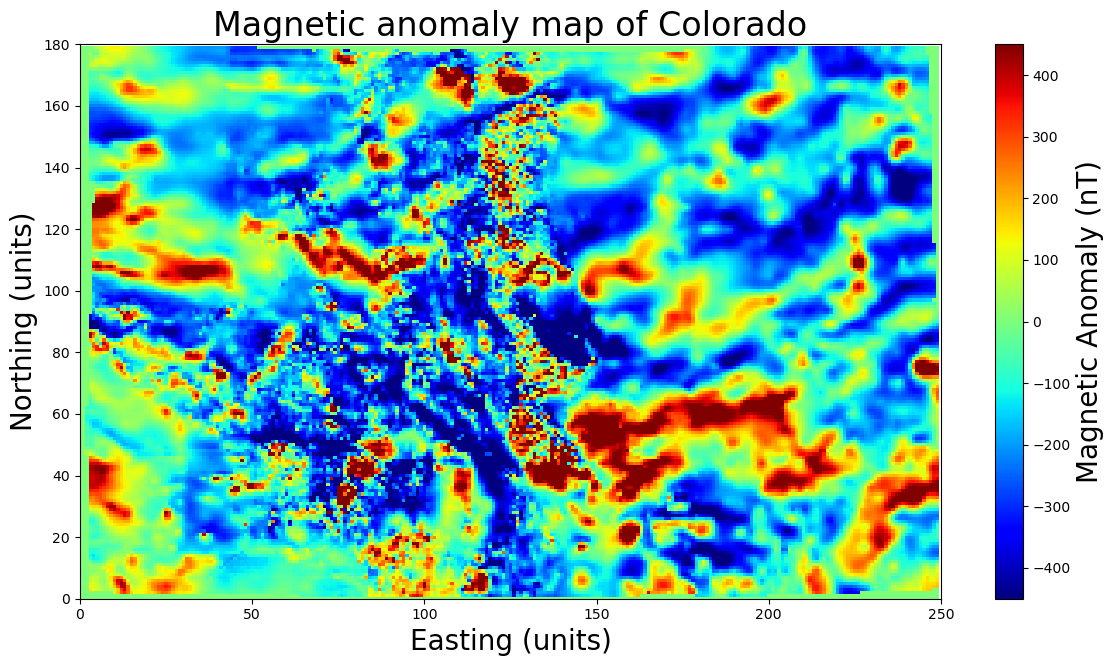

In [2]:
## . . Read in data from ASCII file line-by-line and append to array "array"
myfile = "./data/co_mag_gxf"
with open(myfile, "r") as ins:
    array = []
    for line in ins:
        array.append(line)

## . . Retrieve dimensions from header file
nx=int(array[3])
ny=int(array[5])

## . . Extract data and reshape it to one long array
alldata = np.zeros((5,len(array)-43));
for ii in range(43,len(array),1):
    alldata[:,ii-43]=array[ii].split();
newdata = np.reshape(alldata,(nx*ny));

## . . Find dummy values and set to 0 
for ii in range(0,nx*ny,1):
    if newdata[ii] > 1000000: 
        newdata[ii]=0.
       
## . . Reshape into full matrix
magdata = np.reshape(newdata,(ny,nx));

## . . For some reason the file tends to repeat itself ... 
## . . So only using a 250x180 grid
nx1,ny1=250,180

# . . Set up a small 2D meshgrid for the matplotlib pcolormesh routine
ym, xm = np.mgrid[0:ny1,0:nx1]
goodmag = magdata[0:ny1,0:nx1]

## . . Let's plot the map and look at the results!
plt.figure(figsize=(10*nx1/ny1, 10*ny1/nx1))
plt.pcolormesh(xm,ym,goodmag,cmap='jet',vmin=-450, vmax=450)
cbar = plt.colorbar()
cbar.set_label('Magnetic Anomaly (nT)', rotation=90,fontsize=20)
plt.xlabel('Easting (units)',fontsize=20)
plt.ylabel('Northing (units)',fontsize=20)
plt.title('Magnetic anomaly map of Colorado',fontsize=24)
plt.axis([0, 250, 0, 180])

plt.show()

### Your Assignment

(a) Plot the 2D Fourier magnitude spectra and the 2D phase components. You should use the *np.fft.fftshift* command to get the 2D FT centered correctly. 

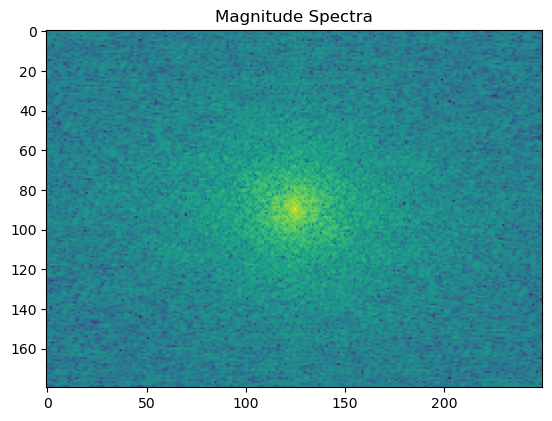

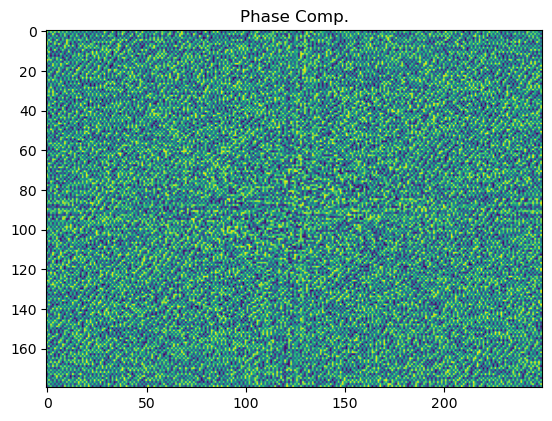

In [3]:
## . . Your answer to Q1a goes here
fft_img=np.fft.fft2(goodmag)/(nx1*ny1)

mag_img=np.abs(np.fft.fftshift(fft_img))

pha_img=np.angle(np.fft.fftshift(fft_img))


plt.imshow(20*np.log(mag_img))
plt.title('Magnitude Spectra')
plt.show()

plt.imshow(pha_img)
plt.title('Phase Comp.')
plt.show()


(b) Produce a **low-pass filtered** version of the map by: 

   * (1) computing the 2D Fourier magnitude spectra and 2D phase, applying a *np.fft.fftshift* to both objects, and setting the 2D Fourier magnitude spectra **inside** a circular disk centered about $[k_x,k_y]=[0,0]$ to zero but keeping the original phase;  
    
   * (2) Recombining the low-pass filtered magnitude spectra with the original phase information; 
    
   * (3) Applying the inverse *np.fft.fftshift* to get the function back to the required layout; and 

   * (4) Inverse 2D Fourier Transforming the result back to the $[x,y]$ domain.  
   
Adjust the radius of the filtering circle until you are pleased with the result.  Try to ensure that you recover about the same scaling (in nT).

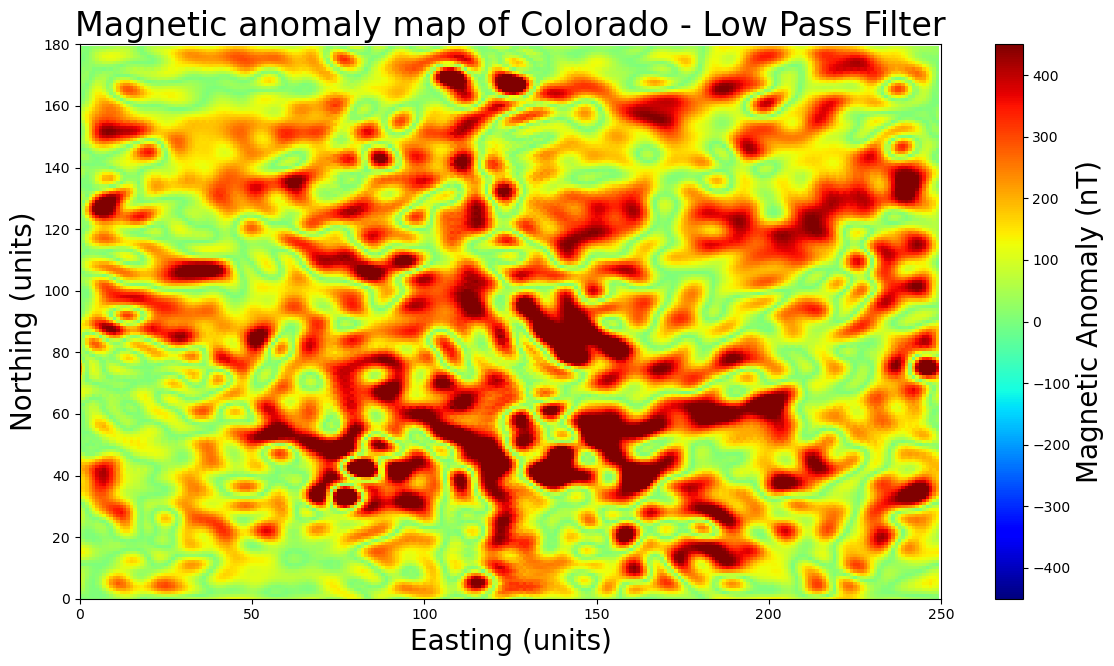

In [4]:
## . . Your answer to Q1b goes here
rad=25
fft_img=np.fft.fft2(goodmag)/(nx1*ny1)
pha_img=np.angle(np.fft.fftshift(fft_img))
mag_imgL=np.abs(np.fft.fftshift(fft_img))

#set mag. spectra values outside our disk to 0 
for x in range(0,nx1-1,1):
    for y in range(0,ny1-1,1):
        r= np.sqrt(((x-nx1/2)**2+(y-ny1/2)**2))
        if (r>rad):
            mag_imgL[y,x]=0

#recombine mag spectra and phase
lowpass_imgFT= mag_imgL*np.exp(1j*pha_img)
#inverse shift
lowpass_img=np.fft.fftshift(lowpass_imgFT)
#inverse 2D FT
#I am not sure how to extract the negative values
lowpass_img=abs(np.fft.ifft2(lowpass_img))*(nx1*ny1)

#plot figure
plt.figure(figsize=(10*nx1/ny1, 10*ny1/nx1))
plt.pcolormesh(xm,ym,lowpass_img,cmap='jet',vmin=-450, vmax=450)
cbar = plt.colorbar()
cbar.set_label('Magnetic Anomaly (nT)', rotation=90,fontsize=20)
plt.xlabel('Easting (units)',fontsize=20)
plt.ylabel('Northing (units)',fontsize=20)
plt.title('Magnetic anomaly map of Colorado - Low Pass Filter',fontsize=24)
plt.axis([0, 250, 0, 180])

plt.show()



(c) Produce a **high-pass filtered** version of the map by: 

   * (1) computing the 2D Fourier magnitude spectra and 2D phase, applying a *np.fft.fftshift* to both objects, and setting the 2D Fourier magnitude spectra inside a circular disk centered about $[k_x,k_y]=[0,0]$ to zero but keeping the original phase; 

   * (2) Recombining the high-pass filtered 2D magnitude spectra with the phase information; 
  
   * (3) Applying the inverse *np.fft.fftshift* to map the result back to the required layout; and 
   
   * (4) Inverse 2D Fourier Transforming the result back to the $[x,y]$ domain.  
   
Adjust the radius of the filtering circle until you are pleased with the result.  Try to ensure that you recover about the same scaling (in nT).

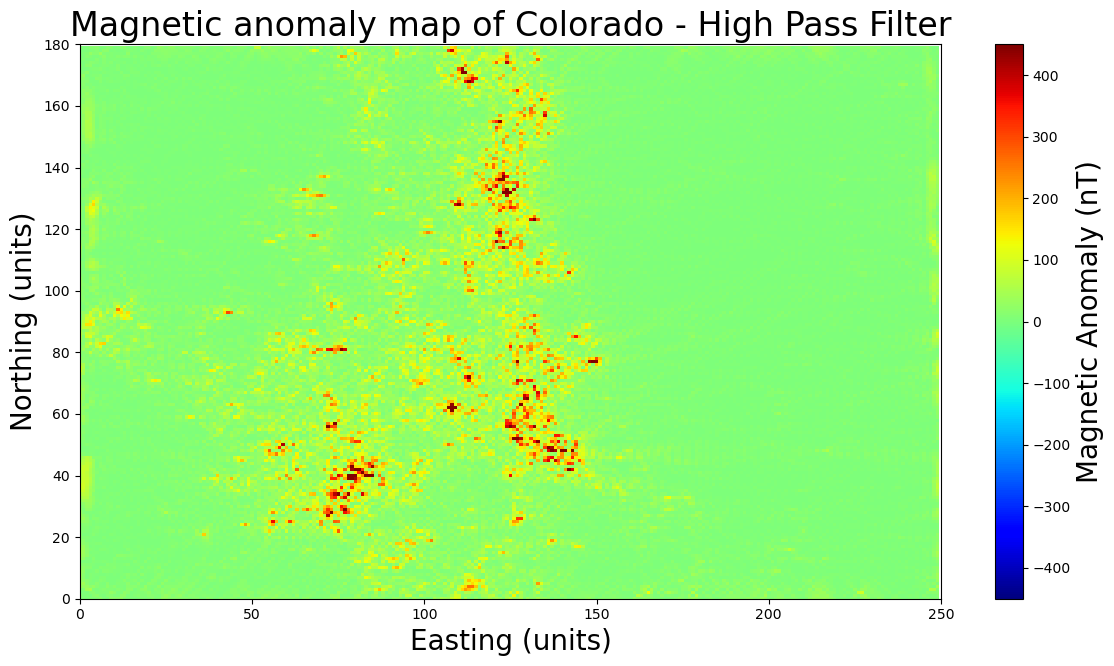

In [5]:
## . . Your answer to Q1c goes here
rad=80
fft_img=np.fft.fft2(goodmag)/(nx1*ny1)
pha_img=np.angle(np.fft.fftshift(fft_img))
mag_imgH=np.abs(np.fft.fftshift(fft_img))

#set mag. spectra values within our disk to 0 
for x in range(0,nx1-1,1):
    for y in range(0,ny1-1,1):
        r= np.sqrt(((x-nx1/2)**2+(y-ny1/2)**2))
        if (r<rad):
            mag_imgH[y,x]=0

#recombine mag spectra and phase
highpass_imgFT= mag_imgH*np.exp(1j*pha_img)
#inverse shift
highpass_img=np.fft.fftshift(highpass_imgFT)
#inverse 2D FT
#I am not sure how to extract the negative values
highpass_img=abs(np.fft.ifft2(highpass_img))*(nx1*ny1)

#plot figure
plt.figure(figsize=(10*nx1/ny1, 10*ny1/nx1))
plt.pcolormesh(xm,ym,highpass_img,cmap='jet',vmin=-450, vmax=450)
cbar = plt.colorbar()
cbar.set_label('Magnetic Anomaly (nT)', rotation=90,fontsize=20)
plt.xlabel('Easting (units)',fontsize=20)
plt.ylabel('Northing (units)',fontsize=20)
plt.title('Magnetic anomaly map of Colorado - High Pass Filter',fontsize=24)
plt.axis([0, 250, 0, 180])

plt.show()



# Q2: Gravity Data

I have downloaded and imported a compilation gravity dataset (Bouguer anomaly) from the [USGS](https://pubs.usgs.gov/of/2000/ofr-00-0042/colorado.htm) that covers the State of Colorado. 

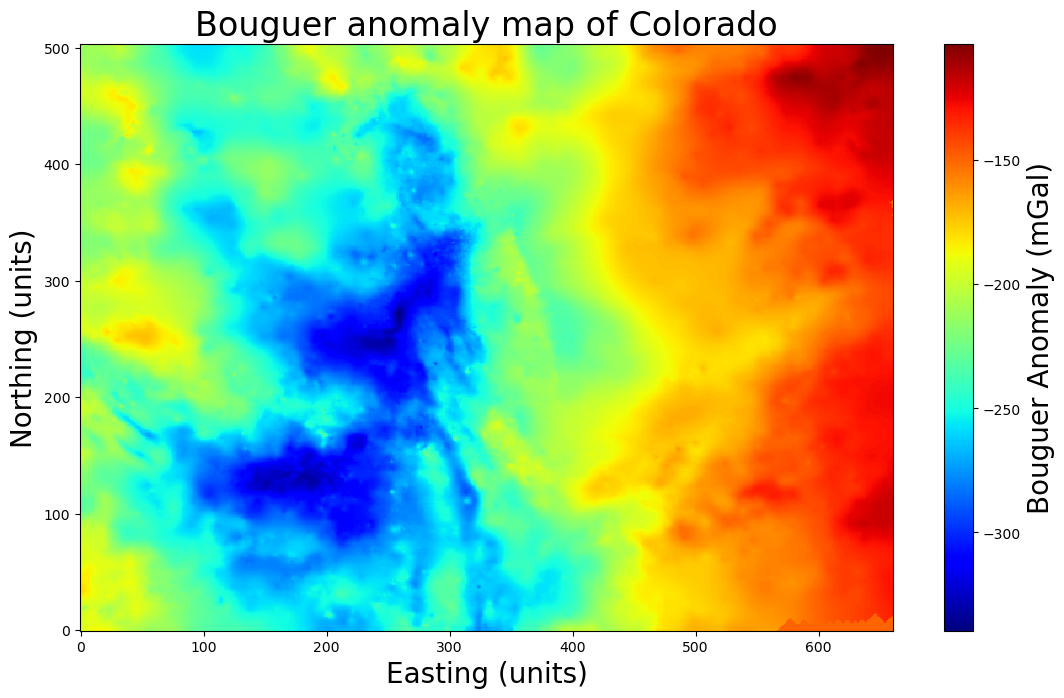

In [6]:
## . . Read in the data file
myfile = "./data/co_boug_gxf"
with open(myfile, "r") as ins:
    garray = []
    for line in ins:
        garray.append(line)
        
# . . Get dimensions of array
nx=int(garray[3])
ny=int(garray[5])

# . . Extract data values from mixed text/data ASCII file
alldata = np.zeros((8,len(garray)-38));
s=" ".join(garray[38:])
test = s.split()
test2 = np.zeros(nx*ny)

# . . Handle dummy values (set to -150 to match on edges)
for ii in range(0,nx*ny,1):
    if float(test[ii]) < -1000000: 
        test2[ii]=-150.
    else:
        test2[ii]=float(test[ii])

# . . Reshape to correct dimensions
gravdata = np.reshape(test2,(ny,nx))

# . . Set up a small 2D meshgrid for the matplotlib pcolormesh routine
yg, xg = np.mgrid[0:ny,0:nx]
plt.figure(figsize=(10*nx/ny, 10*ny/nx))

plt.pcolormesh(xg,yg,gravdata,cmap='jet',vmin=np.min(gravdata), vmax=np.max(gravdata))
plt.xlabel('Easting (units)',fontsize=20)
plt.ylabel('Northing (units)',fontsize=20)
plt.title('Bouguer anomaly map of Colorado',fontsize=24)
cbar = plt.colorbar()
cbar.set_label('Bouguer Anomaly (mGal)', rotation=90,fontsize=20)

plt.show()

### Your Assignment

(a) Plot the 2D Fourier Power Spectra and the 2D phase components. You should use the *np.fft.fftshift* command to get the 2D FT centered correctly.

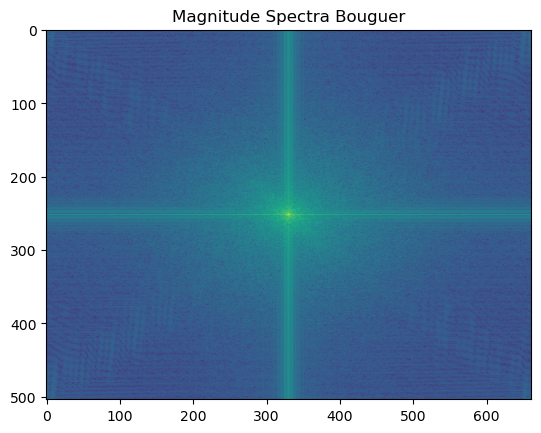

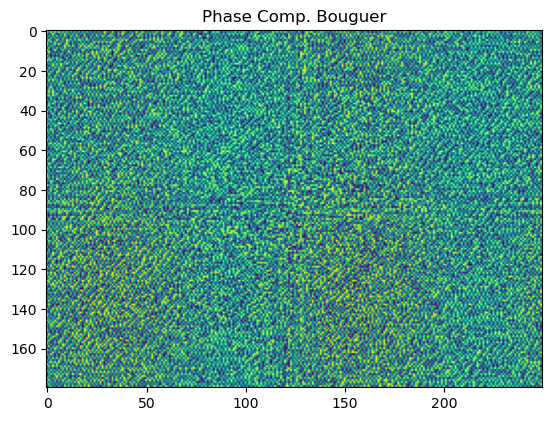

In [7]:
## . . Your answer to Q2a goes here
fft_imgB=np.fft.fft2(gravdata)/(nx*ny)

mag_imgB=np.abs(np.fft.fftshift(fft_imgB))

pha_imgB=np.angle(np.fft.fftshift(fft_imgB))


plt.imshow(20*np.log(mag_imgB))
plt.title('Magnitude Spectra Bouguer')
plt.show()

plt.imshow(pha_img)
plt.title('Phase Comp. Bouguer')
plt.show()

(b) Produce a **low-pass filtered** version of the map by: 
    
   * (1) Computing the 2D Fourier magnitude spectra and 2D phase, applying a *np.fft.fftshift* to both objects, setting the Fourier magnitude spectra **outside** of a circular disk centered about $[k_x,k_y]=[0,0]$ to zero; 
    
   * (2) Recombining the low-pass filtered 2D magnitude spectra with the original phase information; 
    
   * (3) Applying the inverse *np.fft.fftshift* to get the function back to the required layout; and 

   * (4) Inverse 2D Fourier Transforming the result back to the $[x,y]$ domain.  
   
Adjust the radius of the filtering circle until you are pleased with the result.  Try to ensure that you recover about the same scaling (in mGal).

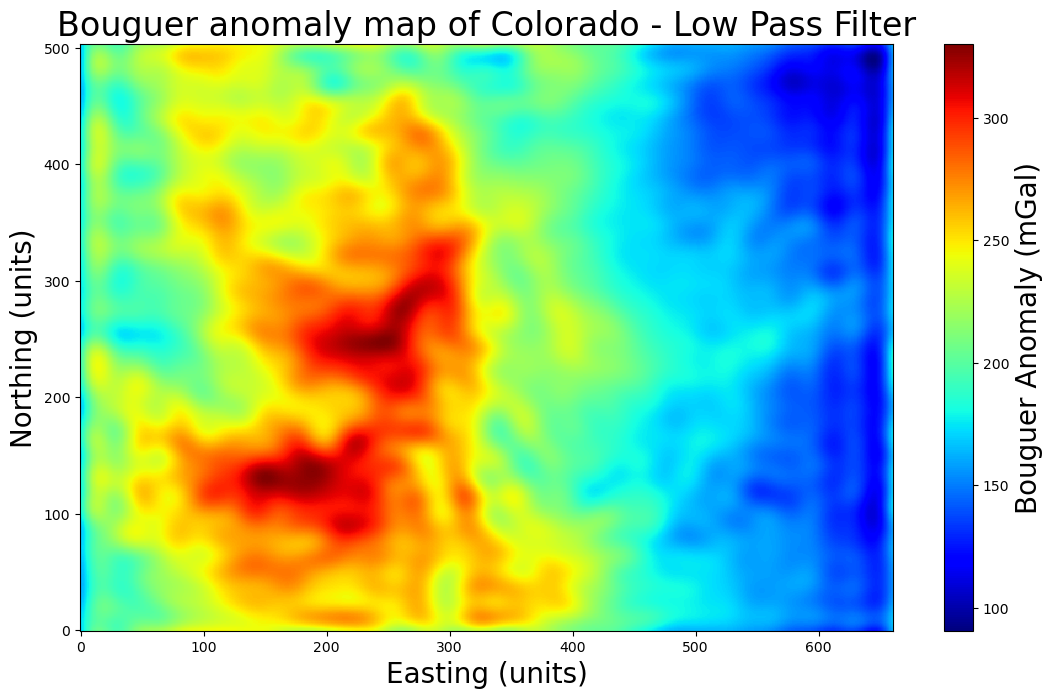

In [8]:
## . . Your answer to Q2b goes here
rad=20

fft_imgB=np.fft.fft2(gravdata)/(nx*ny)
mag_imgBL=np.abs(np.fft.fftshift(fft_imgB))
pha_imgB=np.angle(np.fft.fftshift(fft_imgB))

#set mag. spectra values outside our disk to 0 
for x in range(0,nx,1):
    for y in range(0,ny,1):
        r= np.sqrt(((x-nx/2)**2+(y-ny/2)**2))
        if (r>rad):
            mag_imgBL[y,x]=0
            

#recombine mag spectra and phase
lowpass_imgFTB= mag_imgBL*np.exp(1j*pha_imgB)
#inverse shift
lowpass_imgB=np.fft.fftshift(lowpass_imgFTB)
#inverse 2D FT
#I am not sure how to extract the negative values
lowpass_imgB=abs(np.fft.ifft2(lowpass_imgB))*(nx*ny)


#plot figure
plt.figure(figsize=(10*nx/ny, 10*ny/nx))

plt.pcolormesh(xg,yg,lowpass_imgB,cmap='jet',vmin=np.min(lowpass_imgB), vmax=np.max(lowpass_imgB))
plt.xlabel('Easting (units)',fontsize=20)
plt.ylabel('Northing (units)',fontsize=20)
plt.title('Bouguer anomaly map of Colorado - Low Pass Filter',fontsize=24)
cbar = plt.colorbar()
cbar.set_label('Bouguer Anomaly (mGal)', rotation=90,fontsize=20)

plt.show()


(c) Produce a **high-pass filtered** version of the map by: 

   * (1) Computing the 2D Fourier magnitude spectra and 2D phase, applying a *np.fft.fftshift* to both objects, setting the 2D Fourier magnitude spectra **inside** a circular disk centered about $[k_x,k_y]=[0,0]$ to zero; 

   * (2) Recombining the low-pass filtered 2D magnitude spectra with the original phase information; 
  
   * (3) Applying the inverse *np.fft.fftshift* to get the function back to the required layout; and 
   
   * (4) Inverse 2D Fourier Transforming the result back to the $[x,y]$ domain.  
   
Adjust the radius of the filtering circle until you are pleased with the result.  Try to ensure that you recover about the same scaling (in mGal).

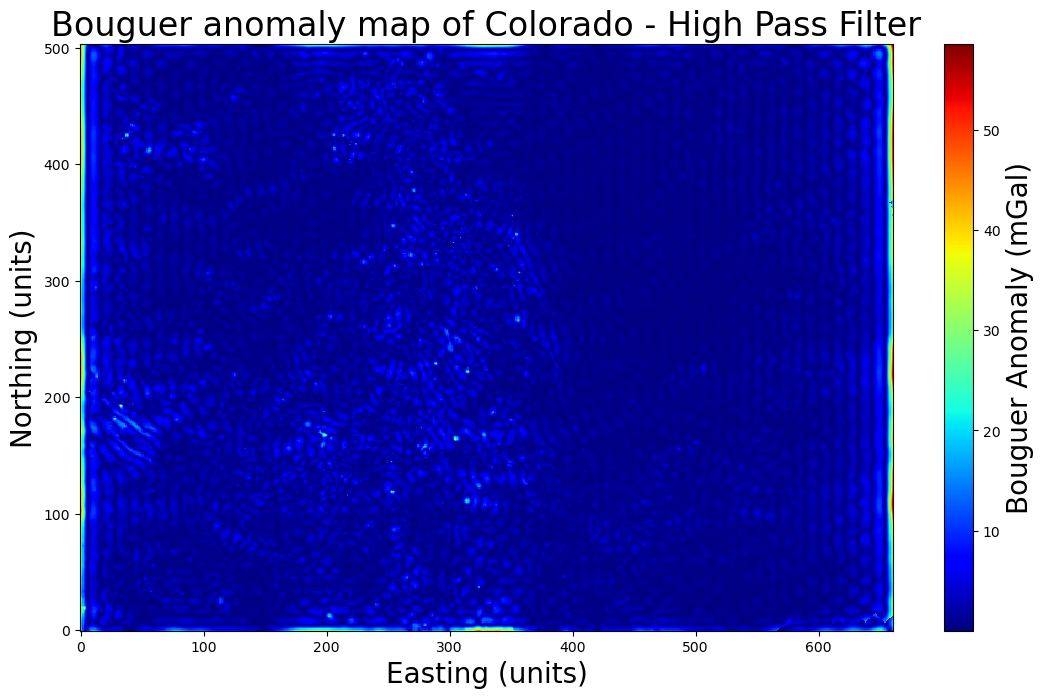

In [9]:
## . . Your answer to Q2c goes here
rad=30

fft_imgB=np.fft.fft2(gravdata)/(nx*ny)
mag_imgBH=np.abs(np.fft.fftshift(fft_imgB))
pha_imgB=np.angle(np.fft.fftshift(fft_imgB))

#set mag. spectra values outside our disk to 0 
for x in range(0,nx,1):
    for y in range(0,ny,1):
        r= np.sqrt(((x-nx/2)**2+(y-ny/2)**2))
        if (r<rad):
            mag_imgBH[y,x]=0
            

#recombine mag spectra and phase
highpass_imgFTB= mag_imgBH*np.exp(1j*pha_imgB)
#inverse shift
highpass_imgB=np.fft.fftshift(highpass_imgFTB)
#inverse 2D FT
#I am not sure how to extract the negative values
highpass_imgB=abs(np.fft.ifft2(highpass_imgB))*(nx*ny)


#plot figure
plt.figure(figsize=(10*nx/ny, 10*ny/nx))

plt.pcolormesh(xg,yg,highpass_imgB,cmap='jet',vmin=np.min(highpass_imgB), vmax=np.max(highpass_imgB))
plt.xlabel('Easting (units)',fontsize=20)
plt.ylabel('Northing (units)',fontsize=20)
plt.title('Bouguer anomaly map of Colorado - High Pass Filter',fontsize=24)
cbar = plt.colorbar()
cbar.set_label('Bouguer Anomaly (mGal)', rotation=90,fontsize=20)

plt.show()
